<a href="https://colab.research.google.com/github/iammariyas/Summer_Practice/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 3.1 Модуль pandas

Вам дан фрагмент базы данных, содержащий информацию о продажах туров в различные города России. База данных состоит из трёх таблиц в формате csv с разделителем "точка с запятой".

Файл **travel_agents.csv** содержит информацию о туроператорах. Заголовок таблицы имеет следующий вид: **ID туроператора;Название;Адрес**

Файл **travels.csv** содержит информацию об основных характеристиках каждого тура. Заголовок таблицы имеет следующий вид: **ID тура;Город;Продолжительность, дней;Стоимость, на 1 чел**

Файл **sale_of_tour_packages.csv** содержит информацию о проданных турах за первый квартал 2022 года. Заголовок таблицы имеет следующий вид: ID операции;Дата;ID тура;ID туроператора;Количество
проданных путёвок; **Текст, выделенный полужирным шрифтом**

На рисунке ниже приведена схема указанной базы данных:

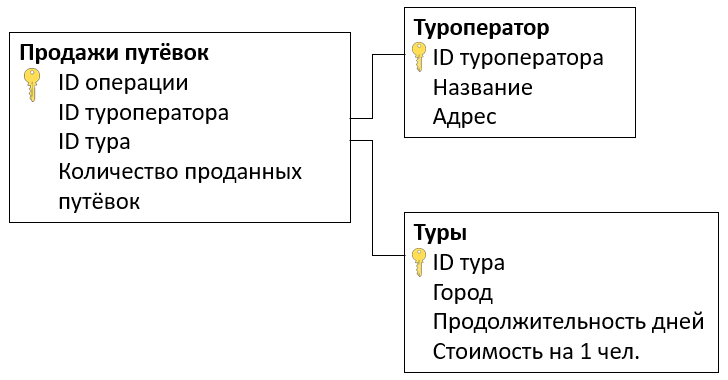

Пользуясь информацией из приведённой базы данных выполните следующие задания:

## 19 Вариант

1. Найти количество продаж туров длительностью неделя и более.
2. Построить круговую диаграмму, отображающую количество человек, которые совершили путешествия, пользуясь услугами туроператора "Вместе". Диаграмма должна отображать общее количество человек и распределение их по городам путешествия.
3. Построить диаграмму, показывающую зависимость стоимости путёвки от её продолжительности.

In [ ]:
import pandas as pd

In [ ]:
sales = pd.read_csv('sale_of_tour_packages.csv', delimiter=';')
travels = pd.read_csv('travels.csv', delimiter=';')
agents = pd.read_csv('travel_agents.csv', delimiter=';')

Объединим данные из `sale_of_tour_packages.csv` и `travels.csv` по ID тура

Решим первое задание:

In [ ]:
data_merge = pd.merge(sales, travels, on='ID тура')
data_merge

,ID операции,Дата,ID тура,ID туроператора,Количество проданных путёвок,Город,"Продолжительность, дней","Стоимость, на 1 чел"
0,OP0001,01.01.2022,R1120,T105,15,Кемь,5,17300
1,OP0002,01.01.2022,R1108,T100,14,Мурманск,5,29200
2,OP0003,01.01.2022,R1128,T115,13,Сыктывкар,10,11400
3,OP0004,01.01.2022,R1104,T110,5,Вологда,10,11400
4,OP0005,01.01.2022,R1108,T100,11,Мурманск,5,29200
...,...,...,...,...,...,...,...,...
4996,OP4997,31.03.2022,R1126,T103,20,Костомукша,7,19700
4997,OP4998,31.03.2022,R1109,T107,10,Няндома,4,8100
4998,OP4999,31.03.2022,R1130,T108,19,Кострома,6,17300
4999,OP5000,31.03.2022,R1132,T110,20,Великие Луки,7,24100


Теперь узнаем туры с продолжительностью неделя и более и найдем их количество:

In [ ]:
tour_weekly = data_merge[data_merge['Продолжительность, дней'] >= 7]
sale = tour_weekly['Количество проданных путёвок'].sum()
sale

np.int64(27719)

Ответ: $27719$ путевок было продано продолжительностью неделя и более

Выполним второе задание:

In [ ]:
agents

,ID туроператора,Название,Адрес
0,T100,Путешественник,"Айвазовского ул, 53"
1,T101,Вокруг света,"Серафимы Дерябиной ул, 24"
2,T102,Традиции,"Токарей ул, 52"
3,T103,Иллюзия,"Космонавтов пр-кт, 104"
4,T104,Даль,"Ясная ул, 2"
5,T105,Восторг,"Высоцкого ул, 12"
6,T106,Дивный мир,"Таватуйская ул, 14"
7,T107,Горизонт,"Черепанова ул, 121"
8,T108,Друг,"Токарей ул, 59"
9,T109,Палатка,"Таватуйская ул, 14"


Узнаем ID туроператора "Вместе" — Т114

In [ ]:
agent_id =  agents[agents['Название'] == 'Вместе']['ID туроператора'].values[0]
agent_id

'T114'

Узнаем продажи только этого туроператора

In [ ]:
agent_sales = sales[sales['ID туроператора'] == agent_id]

Объединим данные о турах с продажами туроператора

In [ ]:
mrg_data = pd.merge(agent_sales, travels, on='ID тура')
mrg_data

,ID операции,Дата,ID тура,ID туроператора,Количество проданных путёвок,Город,"Продолжительность, дней","Стоимость, на 1 чел"
0,OP0014,01.01.2022,R1124,T114,7,Сегежа,8,5600
1,OP0064,02.01.2022,R1117,T114,17,Архангельск,4,15000
2,OP0080,02.01.2022,R1132,T114,15,Великие Луки,7,24100
3,OP0114,02.01.2022,R1112,T114,14,Санкт-Петербург,8,4400
4,OP0123,02.01.2022,R1126,T114,4,Костомукша,7,19700
...,...,...,...,...,...,...,...,...
235,OP4885,29.03.2022,R1124,T114,17,Сегежа,8,5600
236,OP4888,29.03.2022,R1117,T114,6,Архангельск,4,15000
237,OP4925,30.03.2022,R1102,T114,15,Апатиты,7,17400
238,OP4965,31.03.2022,R1115,T114,7,Ярославль,7,17800


Сгруппируем город и количество проданных путевок, и суммируем сколько всего было продано путевок в один город

In [ ]:
city = mrg_data.groupby('Город')['Количество проданных путёвок'].sum()
city

,Количество проданных путёвок
Город,
Апатиты,78
Архангельск,56
Беломорск,112
Великие Луки,89
Великий Устюг,45
Вельск,57
Вологда,72
Иваново,50
Каргополь,105


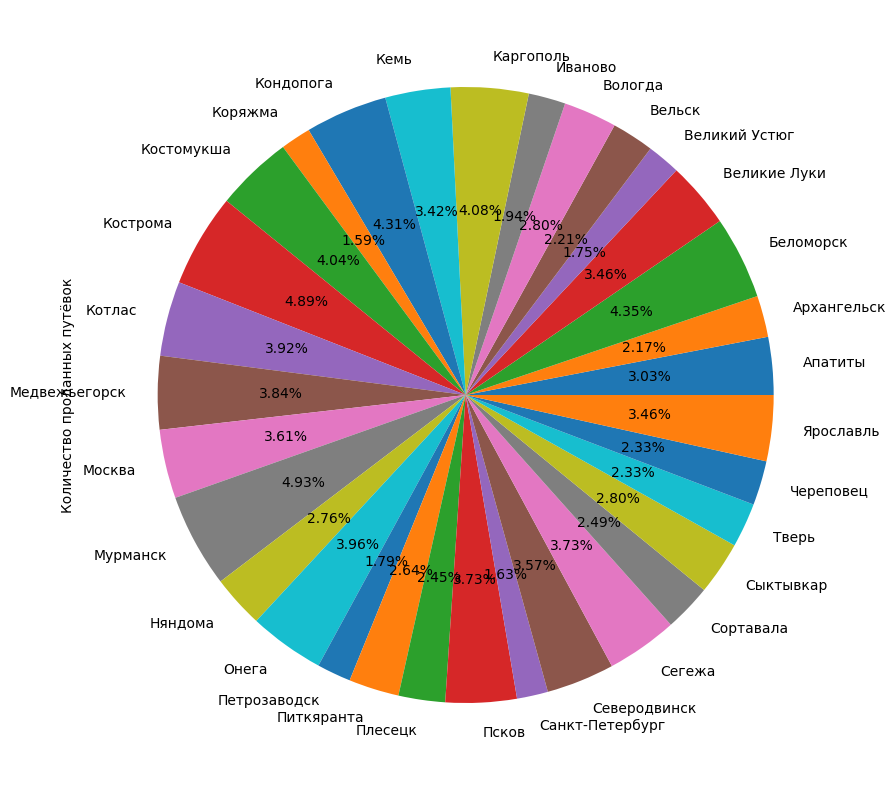

In [ ]:
diagrama = city.plot.pie(autopct='%.2f%%', figsize=(10, 10))

Выполним третье задание:

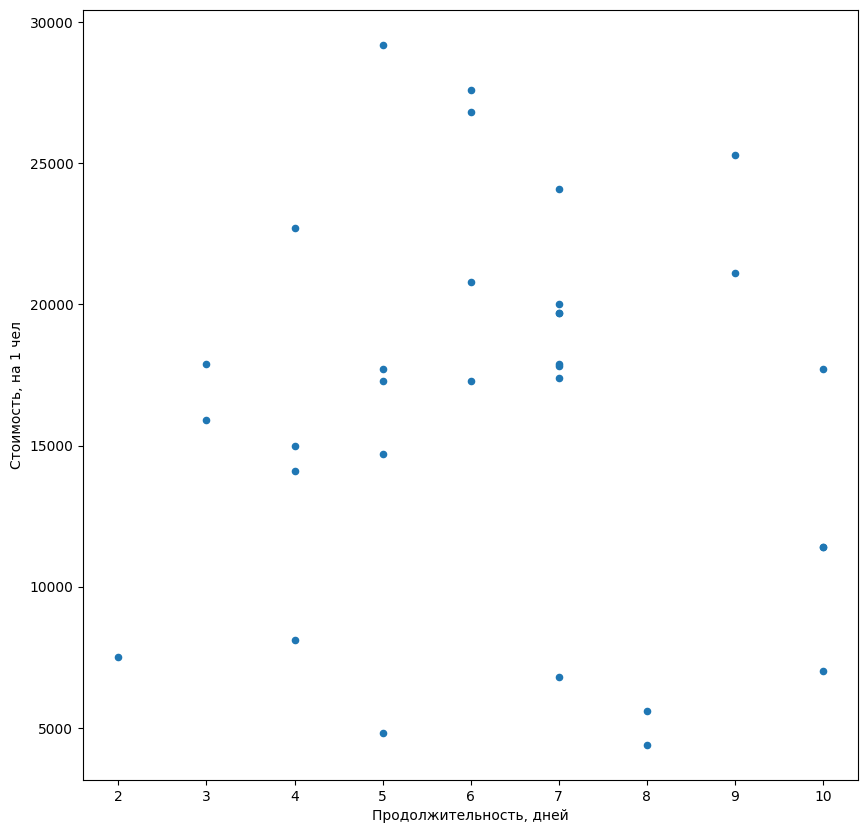

In [ ]:
d = travels.plot.scatter(x = 'Продолжительность, дней', y = 'Стоимость, на 1 чел', figsize=(10, 10))